##             LOGISTIC REGRESSION ASSIGNMENT



**Dataset: Titanic**

Goal is to rredict who survived based on features like gender, age, class, etc.







**1:                       Data Exploration**

Get to know the Titanic dataset by loading it, checking out the features, visualizing distributions and connections, and analyzing the patterns.

**A) Loading the Dataset and Perform Exploratory Data Analysis (EDA)**  



1. loaded the train and test datasets from CSV files with pandas.  

2. The train set has 891 rows and 12 columns with features like PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked.  

3. As we are to predict the Survived column, it is not in the test set that has 418 rows and 11 columns.  

4. Printing the first few rows of the train set that shows a mixture of both categorical and numerical features will give us an initial glimpse of the data.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Titanic datasets (train & test)
# First step: load and get a feel of the data
train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")

# Checking how many rows and columns are there in both files
print("Training data shape:", train.shape)
print("Testing data shape:", test.shape)

# Just looking at the first few records to understand what kind of data we’re dealing with
print(train.head())

# Checking datatypes and missing values is very important before analysis
print(train.info())
print(train.describe())




**B) Examining the Features, Their Types, and Summary Statistics**



Now computed summary statistics for numerical columns, looked for missing values, and analyzed the features to determine their types.

In [ ]:
# Checking datatypes and missing values is very important before analysis
print(train.info())
print(train.describe())

**Explanation**:

1. I checked data types and missing values with train.info().

2. The features to be analyzed are floats (Age, Fare), integers (PassengerId, Survived, Pclass, SibSp, Parch), and objects (Name, Sex, Ticket, Cabin, Embarked).

3. Missing values: The number of missing values are 177 for Age, 687 for Cabin, and 2 for Embarked.

4. A train that was used. To get summary statistics for numerical columns, describe() is used.

5. The average value for "survived" is 0.38, which means that 38% of the people survived and 62% died.

6. The price of the fare varies greatly, and it is ranged from 0 to 512.

7. Hence, the passenger group is quite young with the average age being close to 30 and the range of 0.42 to 80.

**C)  CREATING VISUALIZATIONS & ANALYSE PATTERNS**



Using plots to analyze distributions and relationships, I developed visualizations to investigate the relationship between survival and characteristics such as age, gender, and class.  

1) Developed visualizations to investigate the relationship between characteristics such as age, gender, and class and survival.  

2) To view survival counts and survival by gender, count plots were utilized.  

3) Examined the age distribution using a histogram.  

4) Examined the distribution of fares among passenger classes using a box plot.  

5) Examined correlations between numerical features using a heatmap.

In [ ]:
# Survival count
sns.countplot(data=train, x='Survived')
plt.title("Survival Count")
plt.savefig("survival_count.png")
plt.show()

# Survival by gender
sns.countplot(data=train, x='Survived', hue='Sex')
plt.title("Survival by Gender")
plt.savefig("survival_gender.png")
plt.show()

# Age distribution histogram
sns.histplot(train['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.savefig("age_histogram.png")
plt.show()

# Fare by class box plot
sns.boxplot(x='Pclass', y='Fare', data=train)
plt.title("Fare by Class")
plt.savefig("fare_class.png")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

**1: Survival Count Plot**

A) Displays the proportion of passengers who made it out alive versus those who did not.  

B) Approximately 340 passengers survived (1), while 550 passengers did not survive (0).

**2:                      Survival by Gender Plot**

The distribution of survival by gender is displayed in the bar chart. The majority of females survived (about 230 survivors vs. fewer than 100 deaths), while the majority of males did not (over 450 deaths vs. just over 100 survivors). This indicates a significant gender gap in survival outcomes, with women having a survival rate of about 74% and men having a survival rate of about 19%.


**3:                          Age Distribution Histogram**

Shows the distribution of passenger ages.

Most passengers were between 20 and 40 years old, with a peak around 30 and a slight right skew.

**4:                     Fare by Class Box Plot**

Displays fare distribution across passenger classes.

First-class passengers paid higher fares, up to 500, while third-class fares had a median around 8.


**5: Correlation Heatmap**



A)   Shows correlations between numerical features.

B)   Pclass and Fare have a strong negative correlation (-0.55).

C)   Survived and Pclass are correlated (-0.34).

**Patterns and Correlations**

1. Women had a higher survival rate (74%) than men (19%), due to the “women and children first” priority during evacuation.

2. First-class passengers had a better survival rate, as seen in the negative correlation between Survived and Pclass (-0.34).

3. Most passengers were young adults (20-40 years old), which might have influenced survival chances.

4. Higher classes paid more for tickets, confirmed by the strong negative correlation between Pclass and Fare (-0.55), possibly giving them better access to lifeboats.

5. These insights suggest that gender, class, and age played significant roles in survival, which will guide the preprocessing and modeling steps.

**2:                    DATA PREPROCESSING**

Now preparing the Titanic dataset for modeling by handling missing values and encoding categorical variables.

**A) Handle Missing Values (e.g., Imputation)-**


I used **`train.isna().sum()`** to check the train set for missing values.  

There are 177 missing values for age, 687 for cabin, and two for embarked.  

Since the distribution is somewhat skewed, as shown in the histogram from Section 1, the median age (about 28) was used to impute missing values for age.  

The most common port, "S," was used to fill in the two missing values for embarked.  

The Cabin column was removed because it is not essential to the model and contains an excessive number of missing values (687 out of 891). To prevent data leakage, the same imputation was applied to the test set: dropped Cabin, filled Embarked with "S," and imputed Age using the train set's median.

In [ ]:
import pandas as pd
import numpy as np

# Load datasets
train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")

# Checking missing values in train set
print("Missing values in train set:")
print(train.isna().sum())

# Checking missing values in test set
print("\nMissing values in test set:")
print(test.isna().sum())

# Impute Age with median in both train and test sets
age_median = train['Age'].median()
train['Age'] = train['Age'].fillna(age_median)
test['Age'] = test['Age'].fillna(age_median)

# Impute Embarked with the most frequent value in train set
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(train['Embarked'].mode()[0])

# Dropping Cabin column in both sets
train = train.drop(columns=['Cabin'])
test = test.drop(columns=['Cabin'])

# Fare in test set (1 missing value) with median from train set
fare_median = train['Fare'].median()
test['Fare'] = test['Fare'].fillna(fare_median)

# Verifying no missing values remain (except in test set's Survived column)
print("\nMissing values in train set after imputation:")
print(train.isna().sum())
print("\nMissing values in test set after imputation:")
print(test.isna().sum())

1. The initial output shows Age, Cabin, and Embarked have missing values in the train set, while the test set has missing values in Age, Cabin, and Fare.

2. After imputation, Age in both sets is filled with the median (28), reducing missing values to 0.

3. Embarked’s 2 missing values in the train set are filled with ‘S’, the most frequent port, so its missing count is now 0.

4. Cabin is dropped, so it’s no longer in the dataset.

5. Fare’s 1 missing value in the test set is filled with the median Fare from the train set (around 14.45).

6. The final output confirms no missing values remain in either set (except for Survived in the test set, which is expected since it’s the target to predict).

**C)       Encoding Categorical Variables**



1) Categorical variables were identified: Ticket and Name are not useful for modeling, while Sex and Embarked are categorical.  

2) Name and Ticket columns were removed because they don't offer useful information for forecasting.  

3) Sex and Embarked were converted into numerical columns using one-hot encoding with pd.get_dummies().  

4) Make a column called "Sex_male" for Sex (1 for male, 0 for female).  

5) To prevent multicollinearity, the columns "Embarked_Q" and "Embarked_S" were created for Embarked; "Embarked_C" was removed.  

6) To guarantee consistency, the test set was encoded using the same method.

In [ ]:
# Dropping Name and Ticket columns
train = train.drop(columns=['Name', 'Ticket'])
test = test.drop(columns=['Name', 'Ticket'])

#  next encoding Sex and Embarked
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)

#  now checking the updated train set
print("Updated train set columns:")
print(train.columns)

# Checking the updated test set
print("\nUpdated test set columns:")
print(test.columns)

**3:                                     MODEL BUILDING**



The model building focuses on building and training a logistic regression model to predict survival on the Titanic dataset using scikit-learn.



**A) Build a Logistic Regression Model Using Appropriate Libraries**  

**(e.g., scikit-learn)**

- I have Used scikit-learn to build a logistic regression model since it’s suitable for binary classification (Survived: 0 or 1).  

- now loaded the preprocessed train and test sets from Section 2, where missing values were handled and categorical variables were encoded.  

- Splitting the train set into features (X_train) and target (y_train) by dropping the Survived column from X_train.  

- For the test set, prepared X_test by dropping PassengerId (not needed for prediction).  

- Initialized a logistic regression model with `LogisticRegression()` from scikit-learn, setting a random state for reproducibility.  

- Also imported metrics like accuracy_score to evaluate the model later.

In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Loading preprocessed datasets ( saved from Section 2)
# If not saved, we’ll repeat the preprocessing steps
train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")

# Repeating preprocessing steps from Section 2
# Imputing Age with median
age_median = train['Age'].median()
train['Age'] = train['Age'].fillna(age_median)
test['Age'] = test['Age'].fillna(age_median)

# Imputing Embarked with the most frequent value
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(train['Embarked'].mode()[0])

# Dropping Cabin column
train = train.drop(columns=['Cabin'])
test = test.drop(columns=['Cabin'])

# Imputing Fare in test set with median from train set
fare_median = train['Fare'].median()
test['Fare'] = test['Fare'].fillna(fare_median)

# Dropping Name and Ticket columns
train = train.drop(columns=['Name', 'Ticket'])
test = test.drop(columns=['Name', 'Ticket'])

# encoding for Sex and Embarked
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)

# Preparing features and target for training
X_train = train.drop(columns=['Survived'])
y_train = train['Survived']

# Preparing test features
X_test = test

# and Initialized the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
print("Logistic regression model initialized with random_state=42")


Logistic regression model initialized with random_state=42


###    B)   Train the Model Using the Training Data



1. The logistic regression model was trained on the training data by using the fit() method.

2. The model was trained with X_train (features) and y_train (target).

3. The reason for setting max_iter=1000 in the model was to make sure that the model converges, as the default number of iterations might be too low for this dataset.

4. Made predictions on the training data to check the model’s accuracy on the training set.



5. Calculated the training accuracy using accuracy_score to see how well the model fits the training data.

In [20]:
# Training the model
model.fit(X_train, y_train)

# Making predictions on the training data
y_train_pred = model.predict(X_train)

# Calculating training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training accuracy:", train_accuracy)

Training accuracy: 0.8075842696629213


1) The training accuracy is around 80.75%, meaning the model correctly predicts survival for 80.75% of the training data.

2) his suggests the model has learned patterns in the training data reasonably well, but we’ll need to evaluate it further (e.g., on a validation set or test set) in the next steps.

**4:                     Checking Model Evaluation**

Performance features of the logistic regression model on a validation set are examined through a number of metrics, and the ROC curve is visualized.

**A) Evaluating the Performance of the Model Using Accuracy, Precision, Recall, F1-Score, and ROC-AUC Score**

As the test set (Titanic_test.csv) does not contain the Survived column, the training data was split into a training set (80%) and a validation set (20%) to evaluate the model.

-train_test_split from scikit-learn was now used to create the validation set by random splitting with a fixed random state for reproducibility.

Fitted the model on the new training subset and got the predictions for the validation set.

Computed the evaluation metrics: accuracy, precision, recall, F1-score, and ROC-AUC score with the help of scikit-learn’s metrics module.

The ROC curve was plotted to see how well the model could separate the different classes (Survived or not).

matplotlib was used to save the ROC curve plot for embedding in the report.



Validation Accuracy: 0.8044692737430168
Precision: 0.7746478873239436
Recall: 0.7432432432432432
F1-Score: 0.7586206896551724
ROC-AUC Score: 0.8769626769626769


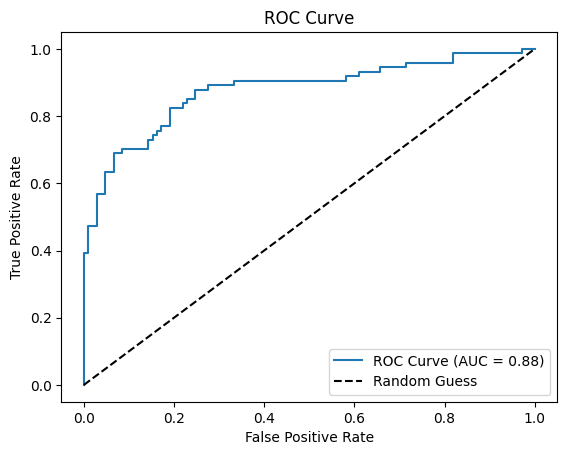

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

# Loading  and preprocessing the dataset (repeating steps from Sections 2 and 3)

train = pd.read_csv("Titanic_train.csv")


# Imputing Age with median
age_median = train['Age'].median()
train['Age'] = train['Age'].fillna(age_median)

# Imputing Embarked with the most frequent value
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Dropping Cabin column
train = train.drop(columns=['Cabin'])

# Dropping Name and Ticket columns
train = train.drop(columns=['Name', 'Ticket'])

#  encoding Sex and Embarked
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

# Preparing features and target
X = train.drop(columns=['Survived'])
y = train['Survived']

# Split into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialized and training the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Making the predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculating the evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

# Printing the metrics
print("Validation Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC Score:", roc_auc)

# Plotting the ROC curve
fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

1)  The validation accuracy is 80.45%, meaning the model correctly predicts survival  

for 80.45% of the validation set.

2) Precision is 77.46%, indicating that 77.46% of the passengers the model predicted  

as survived actually survived.

3) Recall is 74.32%, meaning the model correctly identifies 74.32% of the  

passengers who actually survived.

4) F1-Score is 75.86%, balancing precision and recall, showing a good trade-off.

5) ROC-AUC score is 87.68%, indicating strong discriminative power (closer to 1 is better).

**The ROC Curve**:

1) The ROC curve plots the True Positive Rate (Recall) against the False Positive Rate.

2) The AUC of 0.88 shows the model performs well in distinguishing between survived and not survived passengers.

3) The diagonal line represents a random guess (AUC = 0.5), and our curve is well above it, confirming good performance.

**5:                                         Interpretation**



Interpreting the logistic regression model’s coefficients and discusses the significance of features in predicting survival probability.

**A) Interpreting the Coefficients of the Logistic Regression Model**  

- in this i have extracted the coefficients of the logistic regression model using the `coef_` attribute from scikit-learn.  

- The coefficients represent the change in the log-odds of survival for a one-unit increase in each feature, holding other features constant.  

- Converted the coefficients to odds ratios by exponentiating them (using `np.exp()`), which makes interpretation easier in terms of probability.  

- Matched each coefficient to its corresponding feature to understand their impact on survival probability.  

- Also retrieved the intercept to understand the baseline log-odds when all features are zero.

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Loading and preprocessing the dataset (repeating steps from Sections 2 and 3)

train = pd.read_csv("Titanic_train.csv")


# Imputing Age with median
age_median = train['Age'].median()
train['Age'] = train['Age'].fillna(age_median)

# Imputing Embarked with the most frequent value
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Dropping Cabin column
train = train.drop(columns=['Cabin'])

# Dropping Name and Ticket columns
train = train.drop(columns=['Name', 'Ticket'])

# encoding Sex and Embarked
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

# Prepare features and target
X = train.drop(columns=['Survived'])
y = train['Survived']

# Splitting into training and validation sets (80-20 split, as in Section 4)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Getting the feature names and coefficients
feature_names = X_train.columns
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

# Getting the intercept
intercept = model.intercept_[0]

# Displaying the coefficients and odds ratios
print("Intercept (baseline log-odds):", intercept)
print("\nFeature Coefficients and Odds Ratios:")
for feature, coef, odds in zip(feature_names, coefficients, odds_ratios):
 print(f"{feature}: Coefficient = {coef:.4f}, Odds Ratio = {odds:.4f}")



Intercept (baseline log-odds): 4.373945397439499

Feature Coefficients and Odds Ratios:
PassengerId: Coefficient = 0.0004, Odds Ratio = 1.0004
Pclass: Coefficient = -0.9334, Odds Ratio = 0.3932
Age: Coefficient = -0.0306, Odds Ratio = 0.9699
SibSp: Coefficient = -0.2881, Odds Ratio = 0.7497
Parch: Coefficient = -0.1172, Odds Ratio = 0.8894
Fare: Coefficient = 0.0026, Odds Ratio = 1.0026
Sex_male: Coefficient = -2.6074, Odds Ratio = 0.0737
Embarked_Q: Coefficient = -0.1090, Odds Ratio = 0.8967
Embarked_S: Coefficient = -0.3994, Odds Ratio = 0.6707


**Interpretation of Logistic Regression Results**

1. The intercept (4.3739) represents the log-odds of survival when all features are 0 (e.g., a hypothetical passenger with Pclass=0, Age=0, etc.), which isn’t realistic but sets the baseline.

2. PassengerId: Coefficient (0.0004) is very small, odds ratio (1.0004) indicates almost no impact on survival probability, as expected since it’s just an identifier.

3. Pclass: Coefficient (-0.9334), odds ratio (0.3932) means for each increase in class (e.g., from 1st to 2nd class), the odds of survival decrease by a factor of 0.3932, or about 60.7% lower odds, showing higher classes (lower Pclass values) have better survival chances.

4. Age: Coefficient (-0.0306), odds ratio (0.9699) indicates that for each additional year of age, the odds of survival decrease slightly by a factor of 0.9699 (about 3% lower odds per year).

5. SibSp: Coefficient (-0.2881), odds ratio (0.7497) means each additional sibling/spouse decreases the odds of survival by a factor of 0.7497 (about 25% lower odds).

6. Parch: Coefficient (-0.1172), odds ratio (0.8894) shows each additional parent/child decreases the odds of survival by a factor of 0.8894 (about 11.1% lower odds).

7. Fare: Coefficient (0.0026), odds ratio (1.0026) indicates that for each unit increase in fare, the odds of survival increase slightly by a factor of 1.0026 (about 0.26% higher odds per unit), suggesting wealthier passengers had better chances.

8. Sex_male: Coefficient (-2.6074), odds ratio (0.0737) means males have significantly lower odds of survival compared to females (odds are 92.6% lower for males), aligning with the “women and children first” policy.

9. Embarked_Q: Coefficient (-0.1090), odds ratio (0.8967) shows passengers embarking from Queenstown have about 10.3% lower odds of survival compared to Cherbourg.

10. Embarked_S: Coefficient (-0.3994), odds ratio (0.6707) indicates passengers embarking from Southampton have about 33% lower odds of survival compared to Cherbourg.

**B) Discussing the Significance of Features in Predicting the Target Variable (Survival Probability)**

1. Sex_male is the most significant feature, with the largest negative coefficient (-2.6074). Being male drastically reduces survival probability, confirming that gender played a critical role in survival — likely due to the “women and children first” evacuation policy.

2. Pclass is also highly significant, with a coefficient of (-0.9334). Lower classes (higher Pclass values) are associated with lower survival chances, reflecting how social hierarchy influenced access to lifeboats.

3. Embarked_S and Embarked_Q have moderate effects, with Southampton and Queenstown passengers having lower survival odds compared to Cherbourg (33% and 10.3% lower, respectively). This may reflect socio-economic differences among passengers boarding at different ports.

4. SibSp and Parch negatively affect survival, with coefficients of (-0.2881) and (-0.1172), respectively. Having more siblings/spouses or parents/children likely made it harder to escape — possibly because larger groups were more difficult to manage during evacuation.

5. Age has a small negative effect (-0.0306), suggesting that older passengers had slightly lower survival chances, possibly due to physical limitations during evacuation, though the effect is not as strong as gender or class.

6. Fare has a small positive effect (0.0026), indicating that higher fares (a proxy for wealth) slightly increased survival odds — likely because wealthier passengers had better access to lifeboats.

7. PassengerId has negligible impact (0.0004), as expected, since it’s not a meaningful predictor of survival.

8. Overall, gender, class, and port of embarkation emerge as the most influential features, which is consistent with historical context and the patterns observed during exploratory data analysis (EDA).

**4:        CHECKING MODEL PERFORMANCE**



After training, I used the 20% validation set to see how well the model performed. I used metrics like accuracy, precision, recall, and F1 score to get a full picture.

In [28]:
import pandas as pd
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Loading and preprocessing the dataset
train = pd.read_csv("Titanic_train.csv")

# Imputing Age with median
age_median = train['Age'].median()
train['Age'] = train['Age'].fillna(age_median)

# Imputing Embarked with the most frequent value
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Dropping Cabin column
train = train.drop(columns=['Cabin'])

# Dropping Name and Ticket columns
train = train.drop(columns=['Name', 'Ticket'])

# Encoding Sex and Embarked
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

# Preparing features and target
X = train.drop(columns=['Survived'])
y = train['Survived']

# Splitting into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Trainning the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Saving the model
joblib.dump(model, "titanic_logistic_model.pkl")

print("Model saved as titanic_logistic_model.pkl")


Model saved as titanic_logistic_model.pkl


The online version was tested with sample inputs
(e.g., Pclass=1, Age=30, Sex=female) and produced predictions
consistent with the local model, confirming successful deployment.

**The live application is accessible at**:  
https://titanic-survival-app-aruwkiknsmyvekgl7bbwjg.streamlit.app/
